# Indian Rainfall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from numpy import median
%matplotlib inline

In [2]:
district_wise_rainfall = pd.read_csv("rainfall-in-india/district wise rainfall normal.csv")
district_wise_rainfall.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [3]:
district_wise_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.2+ KB


In [4]:
district_wise_rainfall.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [5]:
# rainfall in India csv file has NA values
india_rainfall = pd.read_csv("rainfall-in-india/rainfall in india 1901-2015.csv").fillna(0)
india_rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [6]:
india_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


In [7]:
india_rainfall.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.938897,21.789431,27.319315,43.085520,85.682920,229.954762,346.623834,289.981414,197.074223,95.344582,39.759621,18.824733,1402.095821,40.688387,155.560860,1062.137974,153.613776
std,33.140898,33.574242,35.901220,46.936787,67.811512,123.211711,234.705204,269.690148,188.895403,135.518992,99.512313,68.624424,42.328296,907.896986,59.285415,201.228532,708.822281,166.902936
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.000000,174.800000,155.650000,100.400000,14.500000,0.600000,0.100000,795.075000,4.100000,23.800000,571.825000,33.500000
50%,1958.000000,6.000000,6.700000,7.800000,15.600000,36.400000,138.650000,284.400000,259.250000,173.700000,64.900000,9.500000,3.000000,1118.650000,19.100000,74.450000,880.250000,97.400000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.500000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


List of Exploratory Analysis - 
 - Visualization of 12 month rainfall all over india (histogram/ boxplot)
 - Visualization Year-wise (Line plot)
 - Visualization state wise in each year (Subplots)
 - Maximum and minimum rainfalls among all state (Top 5/ Last 5) (bar charts)
 - Maximum and minimum rainfalls in each state (Top 5/ Last 5) (Bar charts)
 - Plot on India map (if possible)
 - PLot seasonal rainfall
 - percentage change in rainfall monthly/annually

In [8]:
# Let's find number of states we have

subdivision = india_rainfall['SUBDIVISION'].unique()
subdivision

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [9]:
states = district_wise_rainfall['STATE_UT_NAME'].unique()
states

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

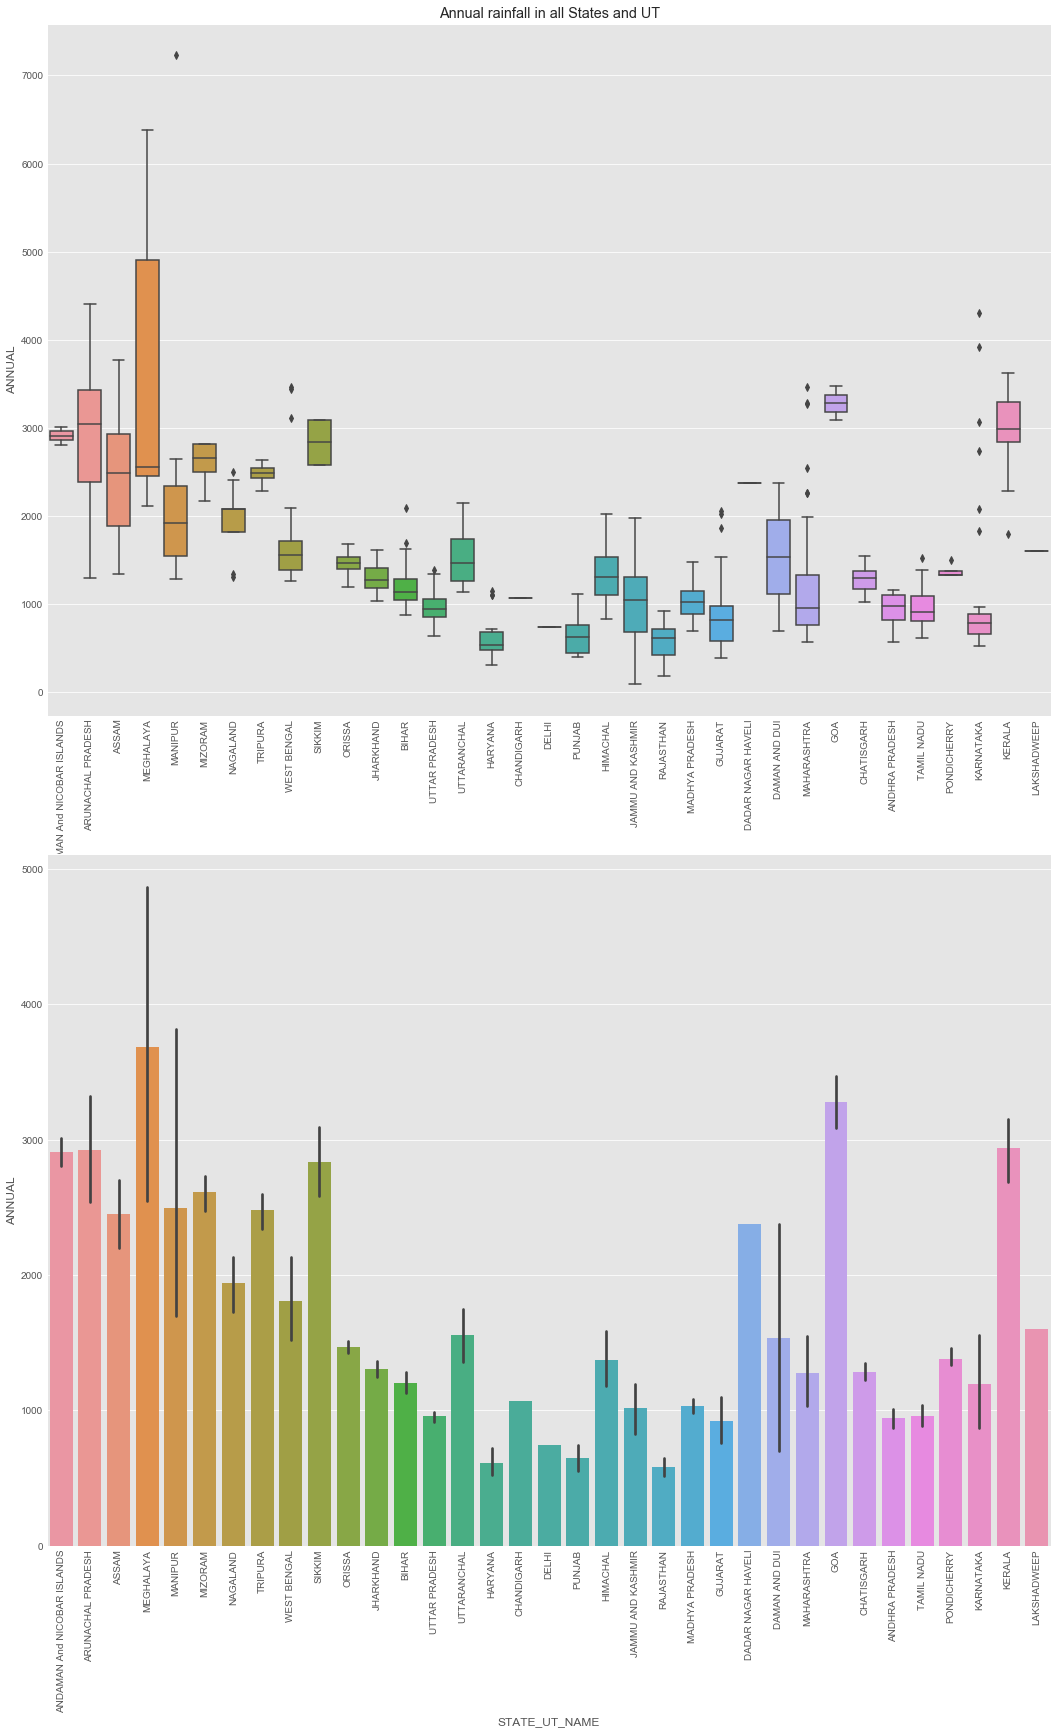

In [29]:

plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 28))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='STATE_UT_NAME', y='ANNUAL', data=district_wise_rainfall)
ax = plt.title('Annual rainfall in all States and UT')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='STATE_UT_NAME', y='ANNUAL', data=district_wise_rainfall)

In [31]:
total_rainfall_in_states = district_wise_rainfall.groupby(['STATE_UT_NAME']).sum()
total_rainfall_in_states['STATE_UT_NAME'] = total_rainfall_in_states.index
total_rainfall_in_states

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,STATE_UT_NAME
STATE_UT_NAME,,,,,,,,,,,,,,,,,,
ANDAMAN And NICOBAR ISLANDS,183.7,99.8,92.4,260.9,1076.5,1256.0,1171.7,1155.9,1265.2,903.3,789.6,479.2,8734.2,283.5,1429.8,4848.8,2172.1,ANDAMAN And NICOBAR ISLANDS
ANDHRA PRADESH,145.4,169.1,232.2,457.1,1121.6,2630.5,4263.4,4126.8,3688.6,3187.8,1356.2,358.0,21736.7,314.5,1810.9,14709.3,4902.0,ANDHRA PRADESH
ARUNACHAL PRADESH,859.0,1492.7,2640.3,4402.6,4804.2,7862.1,8761.3,6057.6,5863.6,2828.3,691.0,575.3,46838.0,2351.7,11847.1,28544.6,4094.6,ARUNACHAL PRADESH
ASSAM,424.8,856.3,2099.6,4894.2,9014.5,12560.0,13360.8,10189.0,8202.6,3684.1,672.9,308.9,66267.7,1281.1,16008.3,44312.4,4665.9,ASSAM
BIHAR,499.1,352.6,375.2,640.9,1963.6,6413.7,12951.8,11000.3,8488.4,2460.4,255.2,219.9,45621.1,851.7,2979.7,38854.2,2935.5,BIHAR
CHANDIGARH,44.3,38.9,33.2,14.8,30.1,120.0,282.4,287.5,154.3,31.8,9.9,23.4,1070.6,83.2,78.1,844.2,65.1,CHANDIGARH
CHATISGARH,186.8,188.5,233.6,236.1,314.7,3250.5,6757.3,6756.1,3860.0,1113.2,152.9,104.6,23154.3,375.3,784.4,20623.9,1370.7,CHATISGARH
DADAR NAGAR HAVELI,0.4,0.3,0.0,0.0,7.4,385.1,884.5,655.9,391.4,38.6,10.5,0.0,2374.1,0.7,7.4,2316.9,49.1,DADAR NAGAR HAVELI
DAMAN AND DUI,1.1,1.0,0.4,0.2,8.3,553.0,1166.2,789.2,455.2,71.1,24.8,0.9,3071.4,2.1,8.9,2963.6,96.8,DAMAN AND DUI


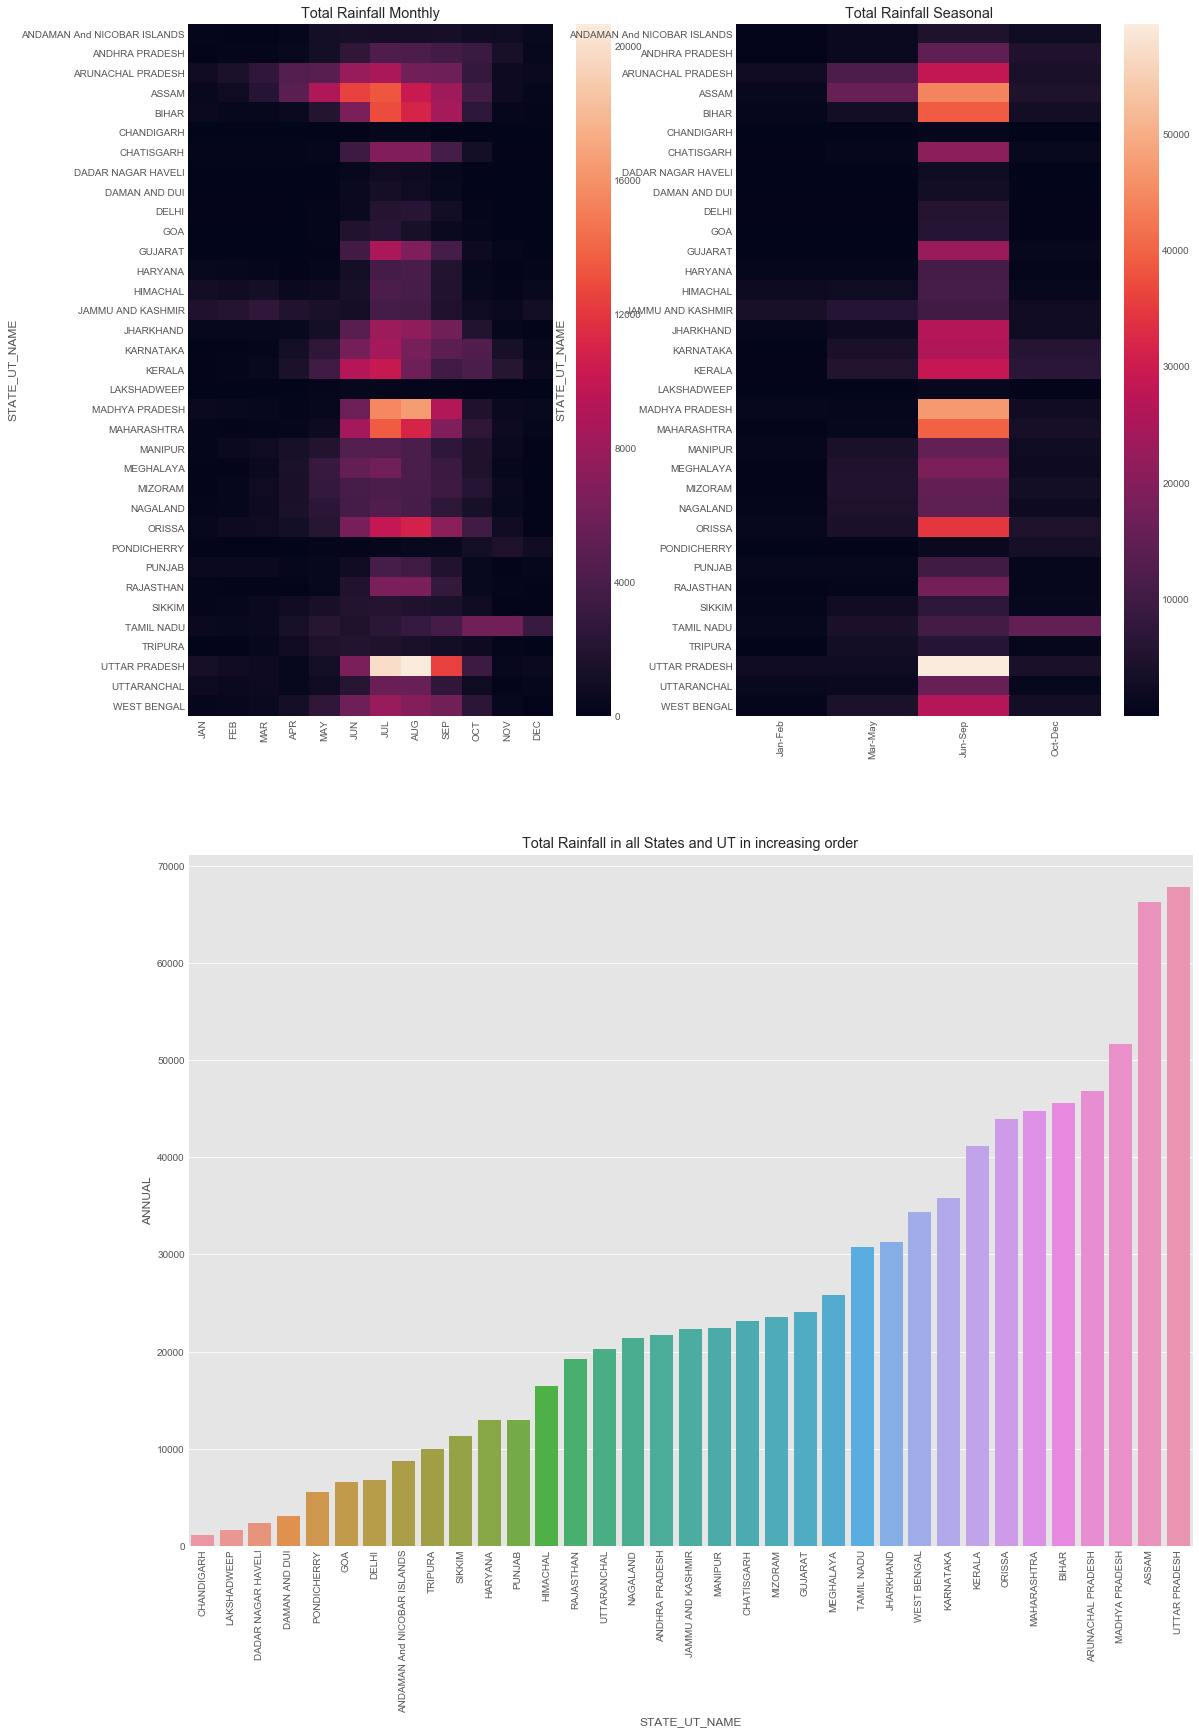

In [33]:
plt.style.use('ggplot')
index = total_rainfall_in_states.index
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(total_rainfall_in_states[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(total_rainfall_in_states[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='STATE_UT_NAME', y='ANNUAL', data=total_rainfall_in_states.sort_values('ANNUAL'))
ax3 = plt.title('Total Rainfall in all States and UT in increasing order')


In [34]:
yearly_rainfall = india_rainfall.groupby(['YEAR']).sum()
yearly_rainfall['rise_fall'] = np.where(yearly_rainfall['ANNUAL'] > yearly_rainfall['ANNUAL'].shift(1), "Rise", "Fall")
yearly_rainfall['YEAR']= yearly_rainfall.index
yearly_rainfall.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,rise_fall,YEAR
YEAR,,,,,,,,,,,,,,,,,,,
1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3,44947.5,2650.3,4827.2,32245.7,5224.2,Fall,1901
1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3,46805.6,588.5,4857.2,35643.5,5716.7,Rise,1902
1903,589.8,502.0,930.2,594.1,2808.3,6019.6,12673.8,10481.9,7581.7,4387.1,1649.8,758.6,47596.9,1091.9,4331.9,36756.8,6716.2,Rise,1903
1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0,43287.0,737.7,5695.7,32685.6,4168.0,Fall,1904
1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2,41516.2,1528.6,5324.5,30771.0,3892.2,Fall,1905


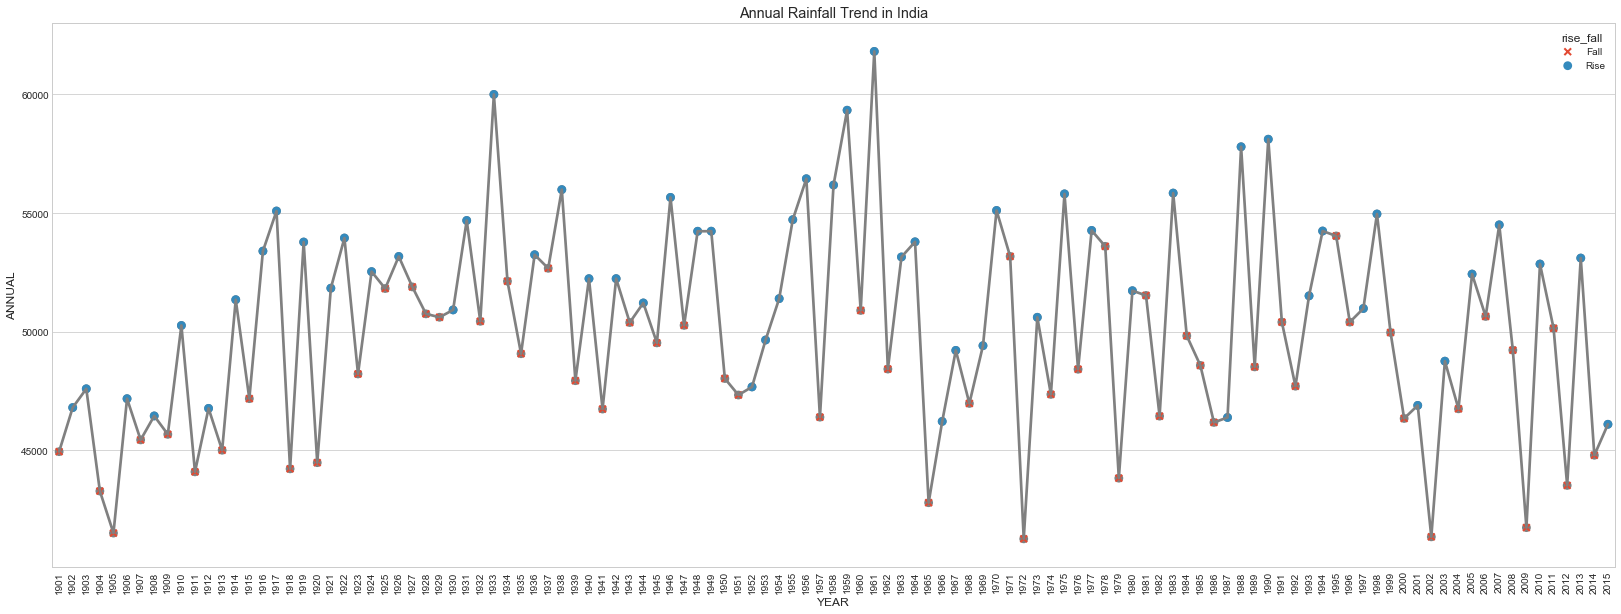

In [14]:
year = yearly_rainfall.index
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(28, 10))

ax = sns.pointplot(x=year, y="ANNUAL", data=yearly_rainfall, color='grey')
ax = sns.pointplot(x=year, y="ANNUAL", data=yearly_rainfall,hue='rise_fall', markers=["x", "o"], join=False)
ax = plt.xticks(rotation=90)
ax = plt.title('Annual Rainfall Trend in India')

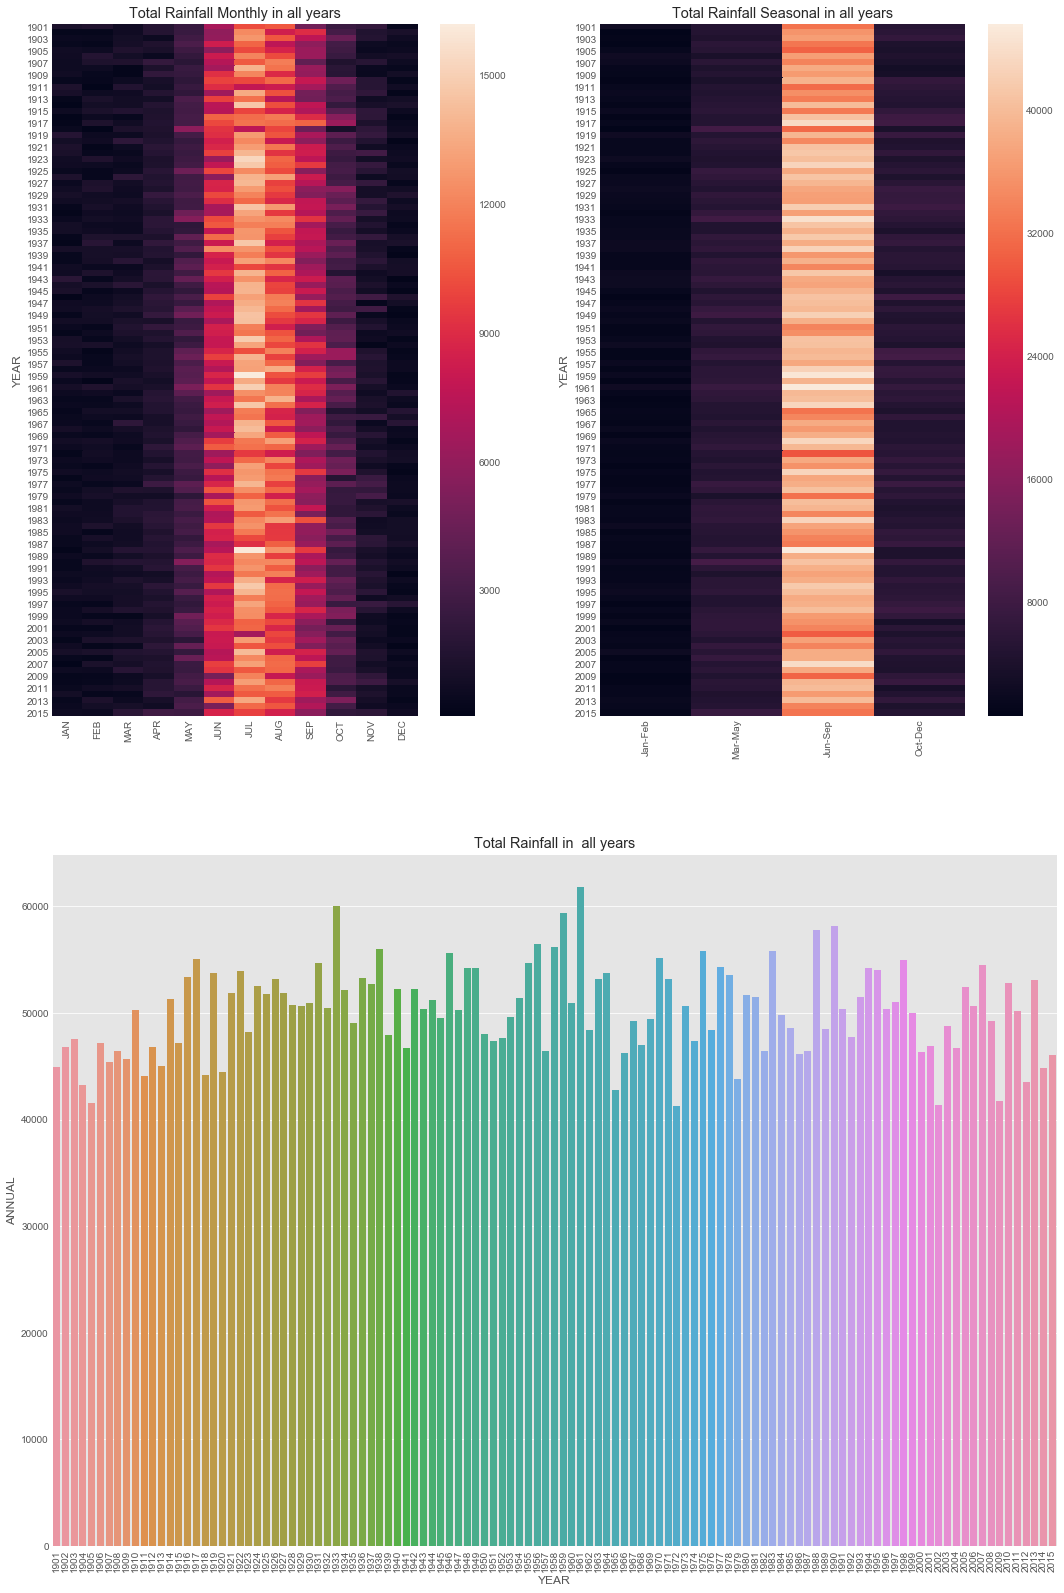

In [35]:
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(yearly_rainfall[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly in all years')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(yearly_rainfall[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal in all years')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='YEAR', y='ANNUAL', data=yearly_rainfall)
ax3 = plt.title('Total Rainfall in  all years')

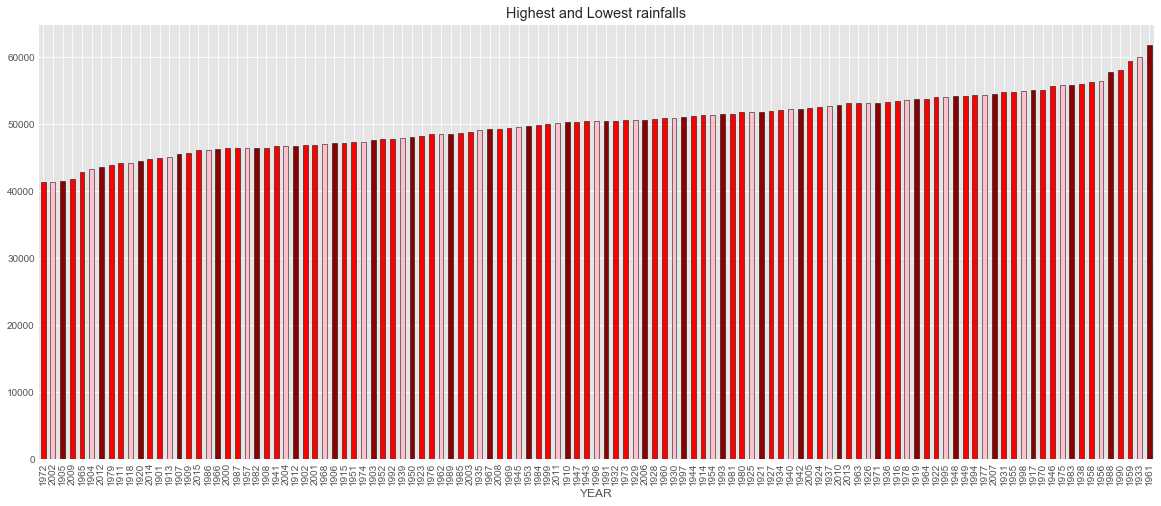

In [59]:
fig = plt.figure(figsize=(20, 8))
ax = plt.xticks(rotation=90)
ax = x1['ANNUAL'].plot.bar(color=['red', 'pink', 'darkred'], edgecolor = 'black')
ax = plt.title('Highest and Lowest rainfalls')


In [60]:
total_rainfall_in_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, ANDAMAN And NICOBAR ISLANDS to WEST BENGAL
Data columns (total 18 columns):
JAN              35 non-null float64
FEB              35 non-null float64
MAR              35 non-null float64
APR              35 non-null float64
MAY              35 non-null float64
JUN              35 non-null float64
JUL              35 non-null float64
AUG              35 non-null float64
SEP              35 non-null float64
OCT              35 non-null float64
NOV              35 non-null float64
DEC              35 non-null float64
ANNUAL           35 non-null float64
Jan-Feb          35 non-null float64
Mar-May          35 non-null float64
Jun-Sep          35 non-null float64
Oct-Dec          35 non-null float64
STATE_UT_NAME    35 non-null object
dtypes: float64(17), object(1)
memory usage: 5.2+ KB


In [75]:
total_rainfall_in_states = total_rainfall_in_states.drop('STATE_UT_NAME', axis=1)
total_rainfall_in_states = total_rainfall_in_states.T
total_rainfall_in_states


STATE_UT_NAME,ANDAMAN And NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHATISGARH,DADAR NAGAR HAVELI,DAMAN AND DUI,DELHI,...,ORISSA,PONDICHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARANCHAL,WEST BENGAL
JAN,183.7,145.4,859,424.8,499.1,44.3,186.8,0.4,1.1,147.6,...,324.3,107,519.3,176.5,190.2,605,44.9,1220,648.6,285.6
FEB,99.8,169.1,1492.7,856.3,352.6,38.9,188.5,0.3,1,146.7,...,671.1,101.7,489.6,155.8,309.2,448.7,134.6,934.2,644.7,362.6
MAR,92.4,232.2,2640.3,2099.6,375.2,33.2,233.6,0,0.4,137.7,...,823.6,66.9,518,125.9,522.4,578.2,374.5,717.6,671.7,531.5
APR,260.9,457.1,4402.6,4894.2,640.9,14.8,236.1,0,0.2,80.1,...,1099.6,49.1,243.2,109,827.6,1363.1,883,377.6,387.6,1076.3
MAY,1076.5,1121.6,4804.2,9014.5,1963.6,30.1,314.7,7.4,8.3,173.7,...,2121.7,163.3,323.3,350.7,1294.2,2161,1566.3,1104.9,759.1,2650.3
JUN,1256,2630.5,7862.1,12560,6413.7,120,3250.5,385.1,553,538.2,...,6375.5,190.7,926.5,1785.2,1935.2,1610.3,1861.7,6444.7,2154.3,5862.1
JUL,1171.7,4263.4,8761.3,13360.8,12951.8,282.4,6757.3,884.5,1166.2,1986.3,...,9969.5,312.1,3812.2,6444.2,1996.8,2323.4,1659.9,19884.8,5626.3,7846.8
AUG,1155.9,4126.8,6057.6,10189,11000.3,287.5,6756.1,655.9,789.2,2209.5,...,10900.4,465.7,3448.3,6420.3,1738.4,2930.3,1425.9,20677.5,5548.2,6869.9
SEP,1265.2,3688.6,5863.6,8202.6,8488.4,154.3,3860,391.4,455.2,991.8,...,7150.1,479.6,1856.7,2842.8,1492.6,3722.9,1041.4,12430.3,2658.2,6041.6
OCT,903.3,3187.8,2828.3,3684.1,2460.4,31.8,1113.2,38.6,71.1,184.5,...,3481.7,1087.8,434,476.2,839.4,5981.7,706.6,3232.3,764.9,2363.1


In [92]:
monthly_total_rainfall = total_rainfall_in_states.head(12)
seasonal_total_rainfall = total_rainfall_in_states.tail(4)

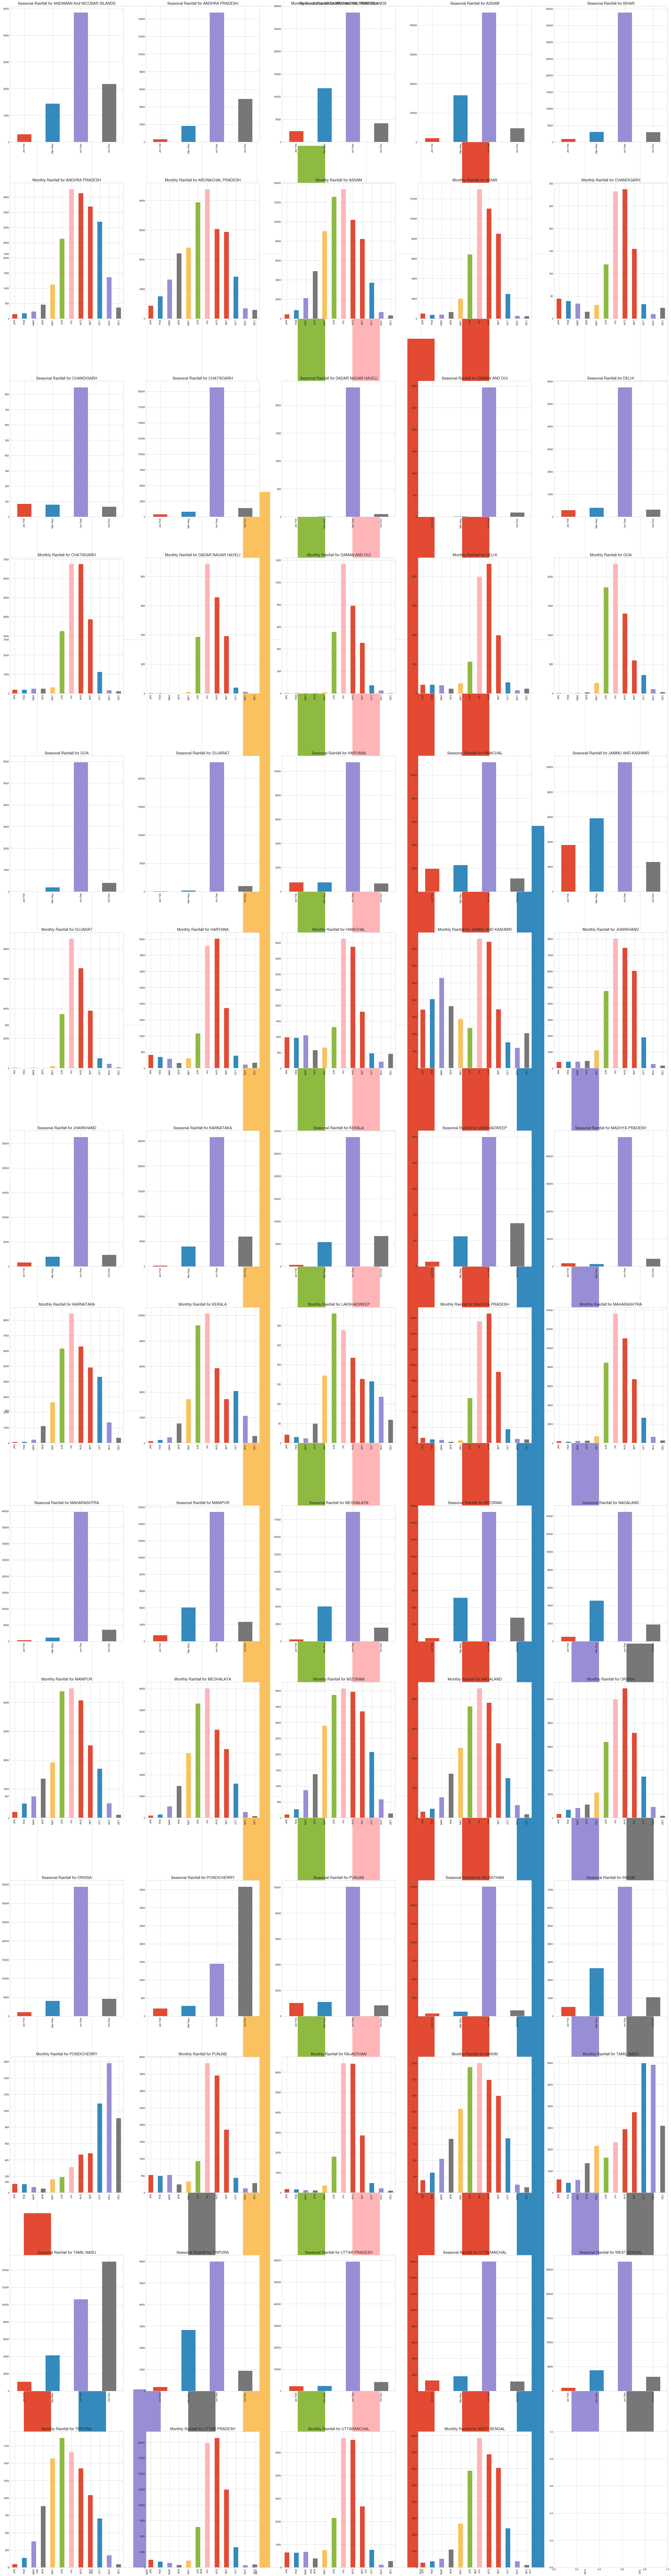

In [115]:
# For each state, we visualize the rainfall patterns in different months and season
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,180))
outer = gridspec.GridSpec(7, 5, wspace=0.2, hspace=0.2)

for i in range(35):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.3, hspace=0.3)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j==0:
            t = monthly_total_rainfall[monthly_total_rainfall.columns[i]].plot.bar()
            t.set_title("Monthly Rainfall for " + str(monthly_total_rainfall.columns[i]))
        else:
            t = seasonal_total_rainfall[seasonal_total_rainfall.columns[i]].plot.bar()
            t.set_title("Seasonal Rainfall for " +str(seasonal_total_rainfall.columns[i]))

        fig.add_subplot(ax)

#fig.tight_layout()


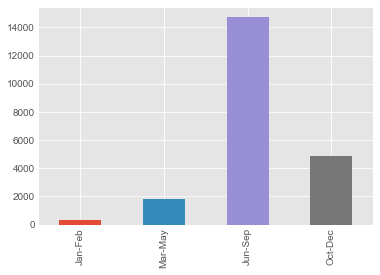

In [102]:
seasonal_total_rainfall[seasonal_total_rainfall.columns[1]].plot.bar()

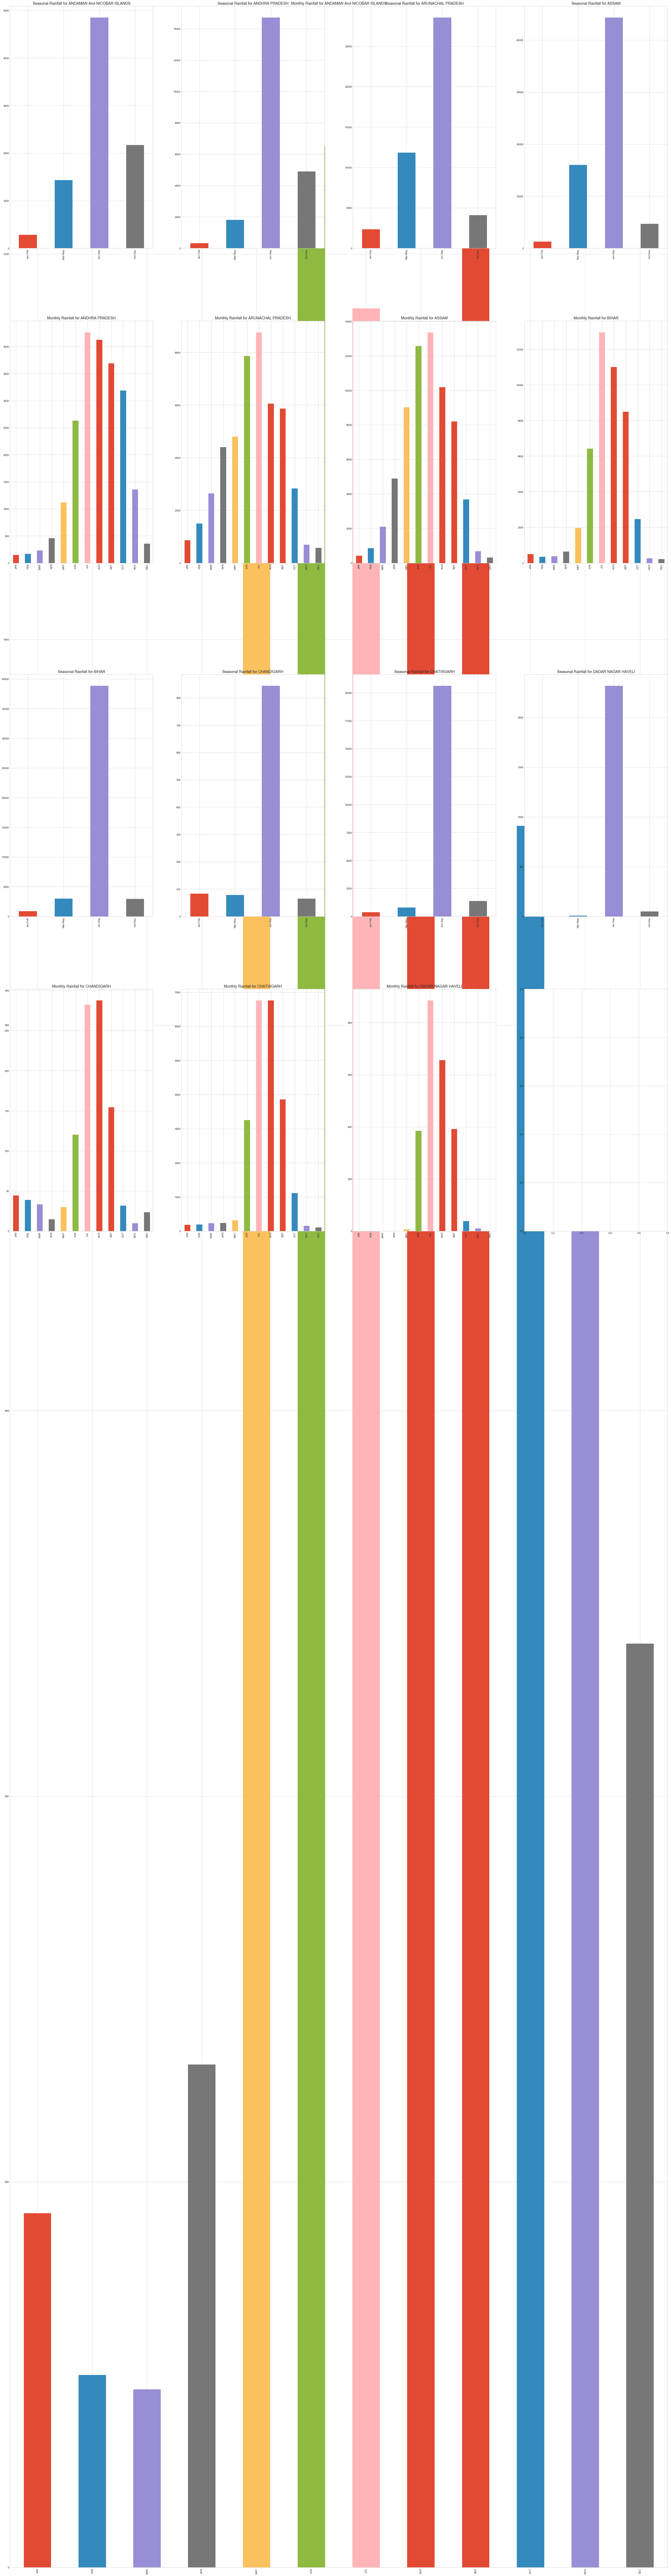

In [116]:
# For each state, we visualize the rainfall patterns in different months and season
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,180))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.3, hspace=0.3)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j==0:
            t = monthly_total_rainfall[monthly_total_rainfall.columns[i]].plot.bar()
            t.set_title("Monthly Rainfall for " + str(monthly_total_rainfall.columns[i]))
        else:
            t = seasonal_total_rainfall[seasonal_total_rainfall.columns[i]].plot.bar()
            t.set_title("Seasonal Rainfall for " +str(seasonal_total_rainfall.columns[i]))

        fig.add_subplot(ax)

#fig.tight_layout()